# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [151]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from IPython.display import HTML

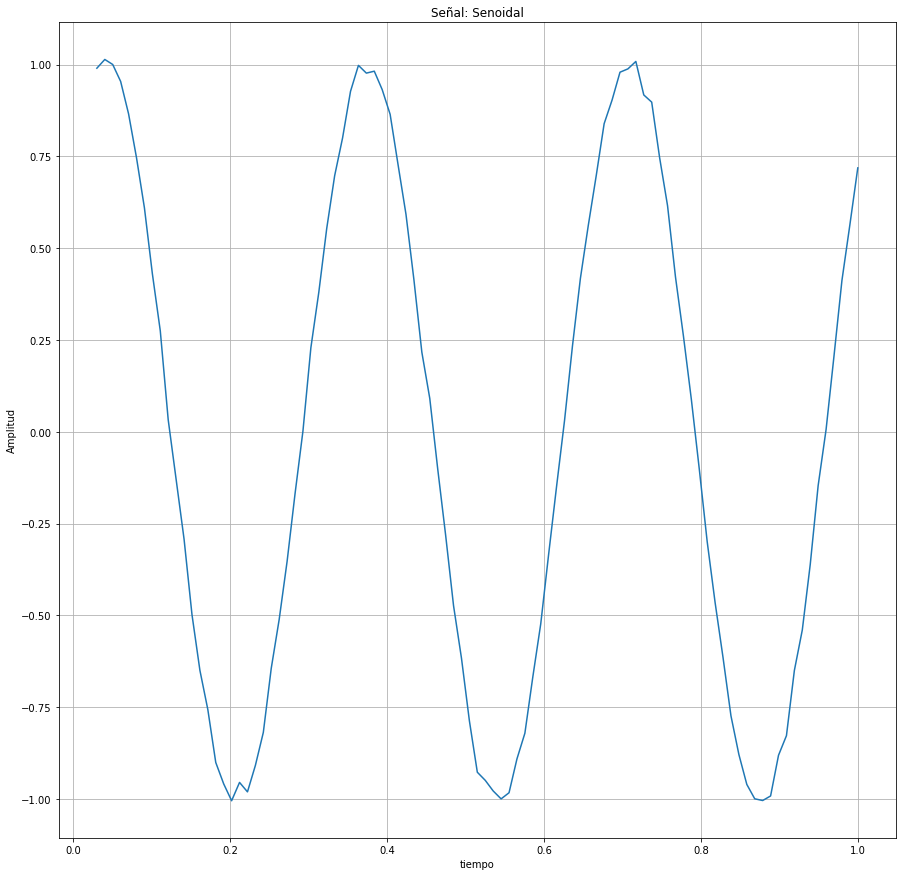

In [63]:
# Señal del problema
N  = 100
M  = 4
fs = 120

w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 

ts = 1/fs # tiempo de muestreo
tt     = np.linspace(0, 1, N).flatten()
signal = np.sin(2*w0*np.pi*tt + phi0)

# Creacion de ruido
noise  =  np.random.normal(0,amp_noise,np.size(signal))
signal_noise  = signal + noise
signal_out    = signal[M-1: -1]

# Graficar señal
plt.figure()
plt.plot(tt[M-1:], signal_noise[M-1:])
plt.title('Señal: Senoidal')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')
plt.show()


In [60]:
## Obtener coeficientes 

# Crear matriz hermetica [M,N-M+1]
rows    = M
columns = np.size(signal_noise) - M
hmatrix = np.zeros((rows, columns))
                   
for i in np.arange(columns):
    hmatrix[ : , i ]  =   signal_noise[np.arange(M + (i - 1) , (i-1) , -1 )]

# Calculo de coeficientes
correlation = hmatrix@hmatrix.transpose()
xcorrelation = hmatrix@signal_out

coef = inv(correlation)@xcorrelation

print(coef)

[ 0.68552963  0.40992214  0.08257578 -0.19941489]


In [134]:
# Calcular señal estimada y error cuadratico

signal_est = hmatrix.transpose()@coef

mse = np.mean((hmatrix - signal_est)**2)

print("Error cuadratico medio: {}".format(mse))

Error cuadratico medio: 0.06268556426723369


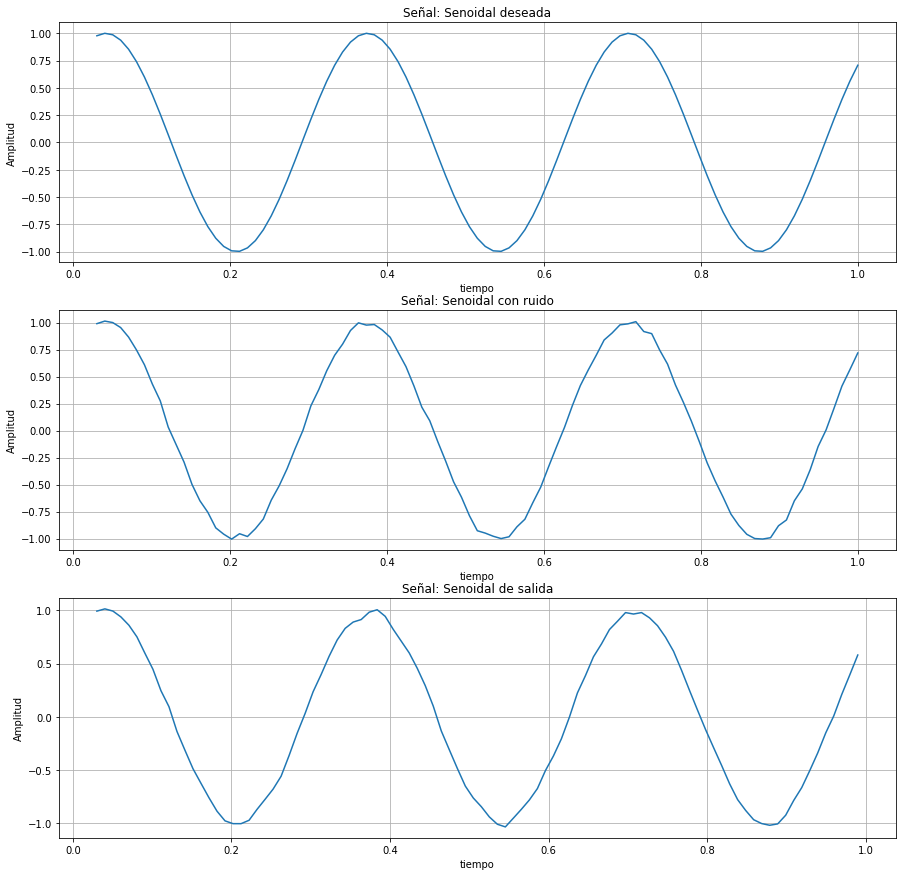

In [132]:
# Grafico de señales obtenida

plt.rcParams['figure.figsize'] = [15, 15]
plt.figure()
plt.subplot(3, 1, 1)
plt.grid()
plt.title('Señal: Senoidal deseada')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:],signal[M-1:])

plt.subplot(3, 1, 2)
plt.grid()
plt.title('Señal: Senoidal con ruido')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:],signal_noise[M-1:])

plt.subplot(3, 1, 3)
plt.grid()
plt.title('Señal: Senoidal de salida')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:-1],signal_est)


In [213]:
# Se encapsula proceso anterior para probar diferentes escenarios con señales senoidales

def predictor(signal, tt_linspace, M, amp_noise, plot=False):
    
    N = np.size(signal)
    # Creacion de ruido
    noise  =  np.random.normal(0,amp_noise,np.size(signal))
    signal_noise  = signal + noise
    signal_out    = signal[M-1: -1]
    
    ## Obtener coeficientes 
    # Crear matriz hermetica [M,N-M+1]
    rows    = M
    columns = np.size(signal_noise) - M
    hmatrix = np.zeros((rows, columns))

    for i in np.arange(columns):
        hmatrix[ : , i ]  =   signal_noise[np.arange(M + (i - 1) , (i-1) , -1 )]

    # Calculo de coeficientes
    correlation = hmatrix@hmatrix.transpose()
    xcorrelation = hmatrix@signal_out

    coef = inv(correlation)@xcorrelation
    if (plot):
        print("Coeficientes: {}".format(coef))
    
    # Calcular señal estimada y error cuadratico
    signal_est = hmatrix.transpose()@coef
    mse = np.mean((hmatrix - signal_est)**2)
    
    if (plot):
        print("Error cuadratico medio: {}, {}".format(mse, mse*100.0))
        plt.figure(figsize=(9, 3), dpi= 80)
        plt.figure()
        plt.subplot(3, 1, 1)
        plt.grid()
        plt.title('Señal: Senoidal deseada')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:],signal[M-1:])
        plt.subplot(3, 1, 2)
        plt.grid()
        plt.title('Señal: Senoidal con ruido')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:],signal_noise[M-1:])
        plt.subplot(3, 1, 3)
        plt.grid()
        plt.title('Señal: Senoidal de salida')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:-1],signal_est)
    
    return mse
    

Coeficientes: [ 0.68115755  0.3756506   0.16765659 -0.24667381]
Error cuadratico medio: 0.06241117309968084, 6.241117309968084


0.06241117309968084

<Figure size 720x240 with 0 Axes>

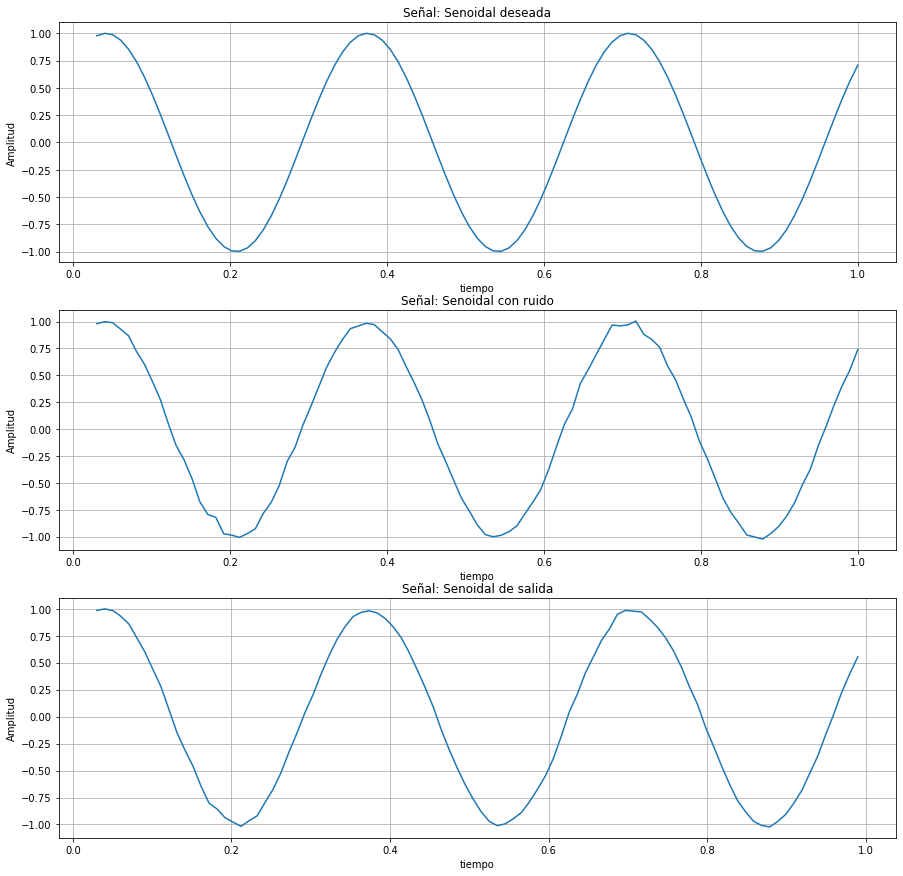

In [214]:
# Señal del problema
# Numero 0

N          = 100
M          = 4
fs         = 120
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise, True)

### Se prueban otros caso de paramtros de senoidales

Coeficientes: [ 0.69442433  0.35646271  0.08739873 -0.16243994]
Error cuadratico medio: 0.07015016516714391


<Figure size 720x240 with 0 Axes>

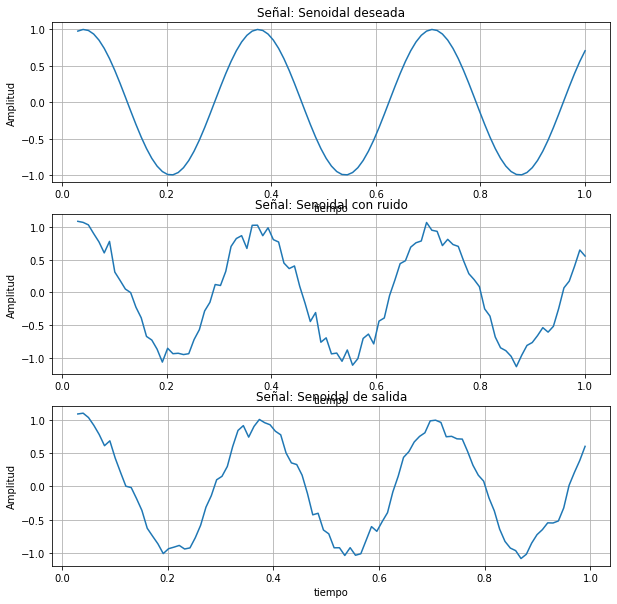

In [129]:
# Se aumenta el la amplitud de ruido 5 veces  [Error = 0.1]

# Numero 1

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 5 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

Al aumentar la amplitud de ruido 5 veces el sistema predictor reduce el efecto creado por el ruido agregado y en efecto esto se nota en el error cuadratico medio.

Coeficientes: [ 0.59706078  0.39389097  0.0965382  -0.13812817]
Error cuadratico medio: 0.08814438313660529, 8.81443831366053


<Figure size 720x240 with 0 Axes>

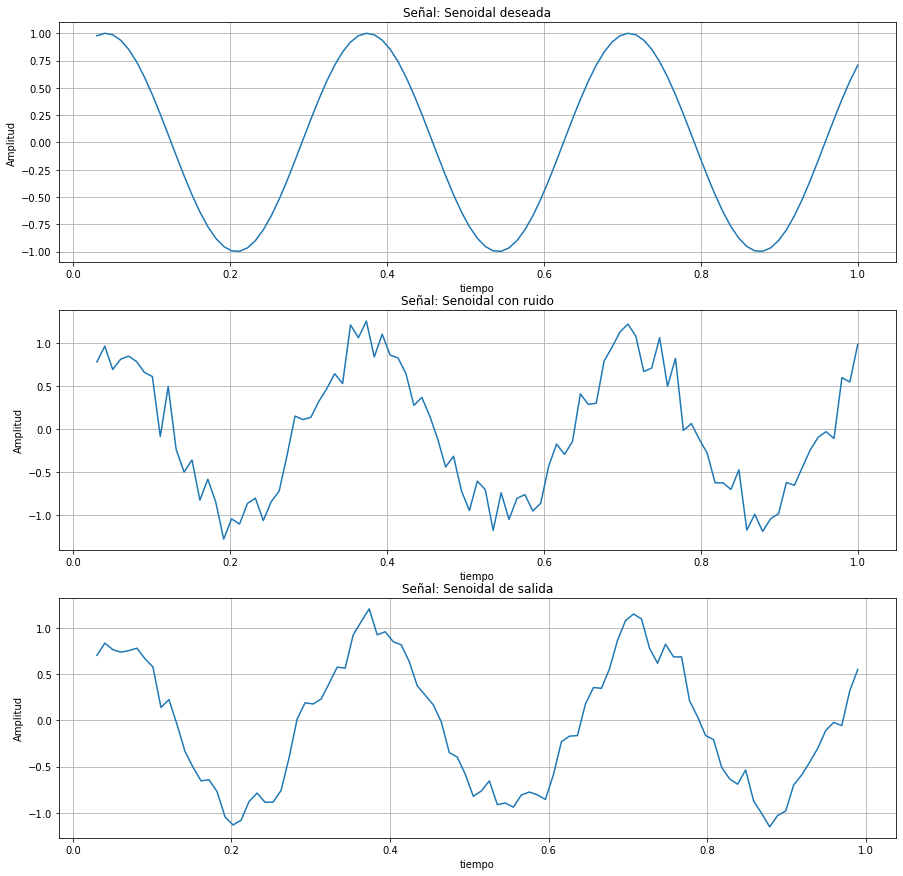

In [145]:
# Se aumenta el la amplitud de ruido 10 veces [Error = 0.2]

# Numero 1

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 10 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

Al aumentar la amplitud de ruido 10 veces el sistema predictor reduce el efecto creado pero la forma de la señal se aleja mucho de la esperada.

Coeficientes: [0.19227328 0.13106568 0.11047303 0.1324746 ]
Error cuadratico medio: 1.0953815478512337, 109.53815478512337


<Figure size 720x240 with 0 Axes>

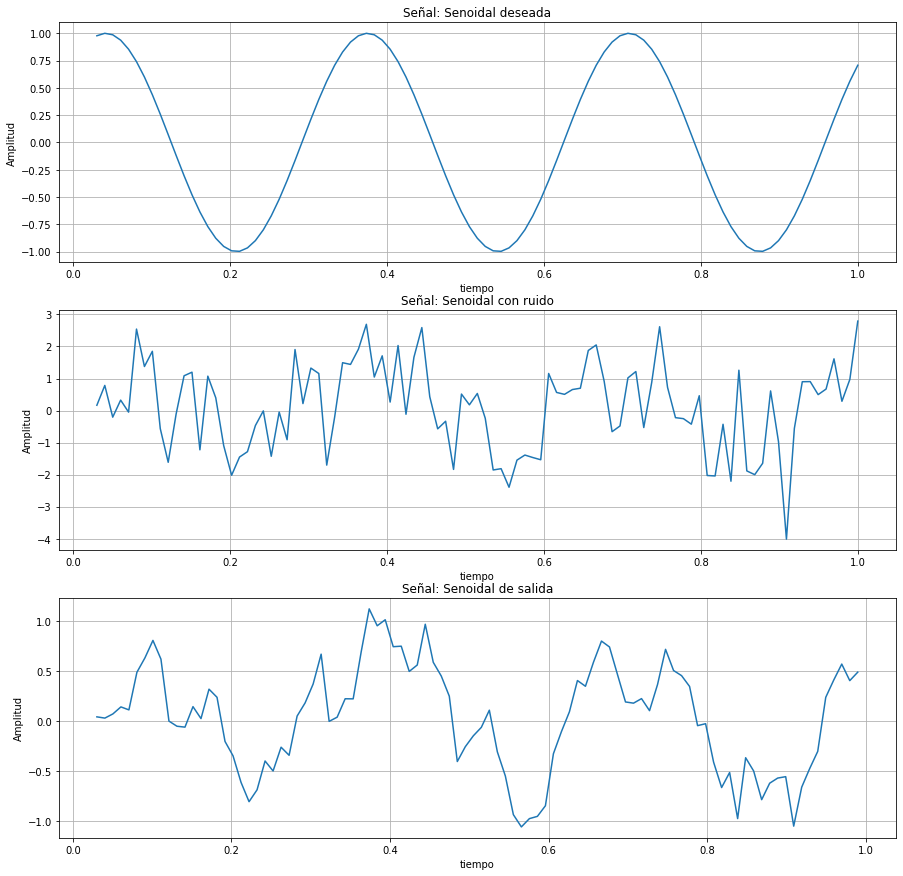

In [146]:
# Se aumenta el la amplitud de ruido 50 veces [Error = 1]

# Numero 2

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 50
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

In [216]:
# Tabla comparativa de errores cuadraticos con N = 100 y M = 4
from pandas import DataFrame
 
def tableFactory(M=4, w0=3, phi0=np.pi/4, amp_noise=0.02):
    error = [1, 5, 10, 50]
    w, h = 3, len(error) + 1;
    rest = [[0 for x in range(w)] for y in range(h)]
    
    # N = 100
    N          = 100
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][0] = ''
    i = 1
    for err in error:    
        rest[i][0] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1

    # N = 500  
    N          = 500
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][1] = ''
    i = 1
    for err in error:    
        rest[i][1] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1

    # N = 1000  
    N          = 1000
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][2] = ''
    i = 1
    for err in error:    
        rest[i][2] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1   

    df = DataFrame(rest, columns=['N = 100','N = 500', 'N = 1000'],
                   index=['Amplitud de error', 
                          0.02,
                          0.1, 
                          0.2, 
                          1
                         ])
    
    print('Tabla comparativa para M = {}'.format(M))

    return df
    
HTML(tableFactory().to_html())

Tabla comparativa para M = 4


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,0.06160,0.00261,0.00084
0.1,0.07503,0.00857,0.00708
0.2,0.08551,0.02732,0.03017
1,0.96834,0.79820,0.81143


In [221]:
# Tabla comparativa de errores cuadraticos M = 10
HTML(tableFactory(M=10).to_html())

Tabla comparativa para M = 10


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,0.44802,0.02052,0.00524
0.1,0.45901,0.02807,0.01240
0.2,0.48554,0.04817,0.03696
1,1.67955,0.90004,0.97634


In [222]:
# Tabla comparativa de errores cuadraticos M = 20
HTML(tableFactory(M=20).to_html())

Tabla comparativa para M = 20


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,1.10421,0.08696,0.02208
0.1,1.08552,0.09253,0.03158
0.2,1.14076,0.11773,0.05668
1,2.10196,0.98630,0.90617


### Realizando pruebas con una señal cuadrada

Coeficientes: [ 0.99578788  0.00836847  0.0069623  -0.00948745]
Error cuadratico medio: 0.3121190903880371, 31.21190903880371


0.3121190903880371

<Figure size 720x240 with 0 Axes>

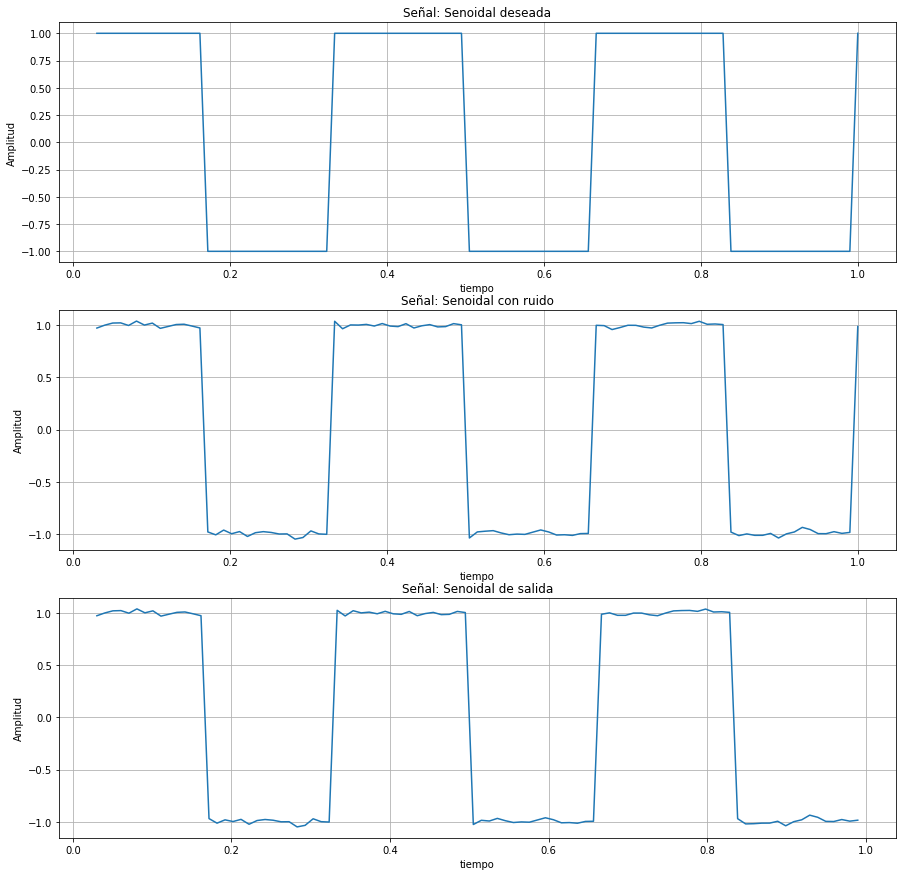

In [226]:
from scipy import signal as sgn

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)

Coeficientes: [ 0.83962148  0.14388034 -0.00454083  0.02791885]
Error cuadratico medio: 0.30352047321605363, 30.35204732160536


0.30352047321605363

<Figure size 720x240 with 0 Axes>

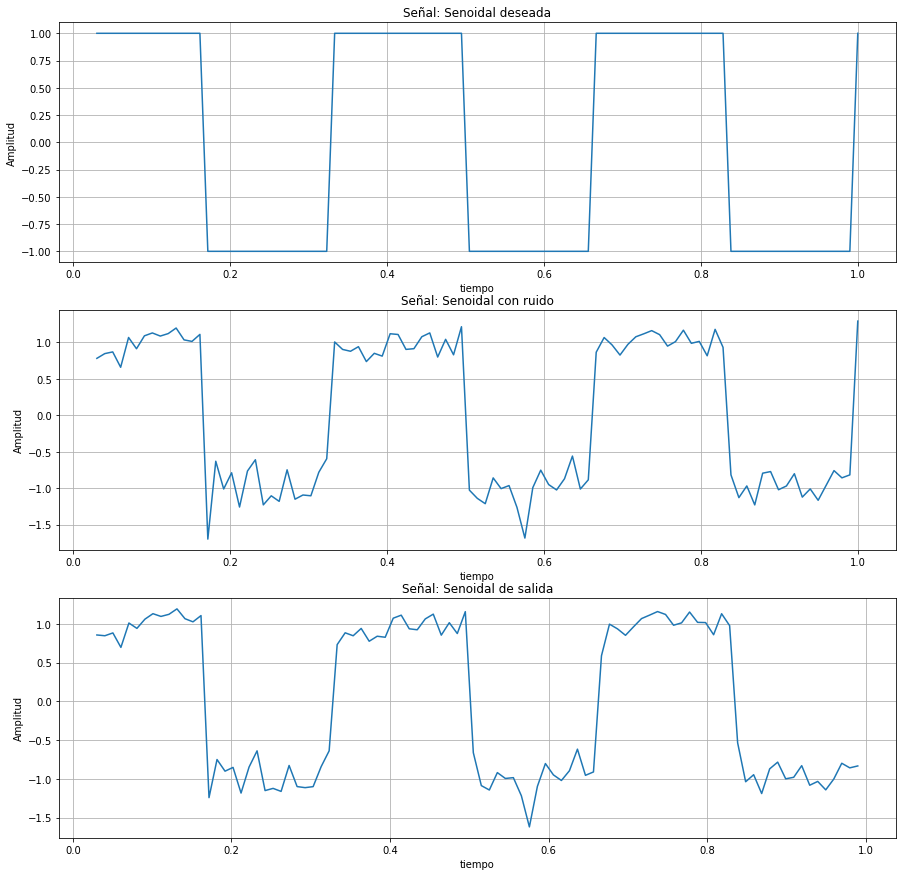

In [230]:
N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 10
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)

Coeficientes: [0.32116259 0.19260931 0.13923454 0.07170011]
Error cuadratico medio: 1.0586304206758765, 105.86304206758766


1.0586304206758765

<Figure size 720x240 with 0 Axes>

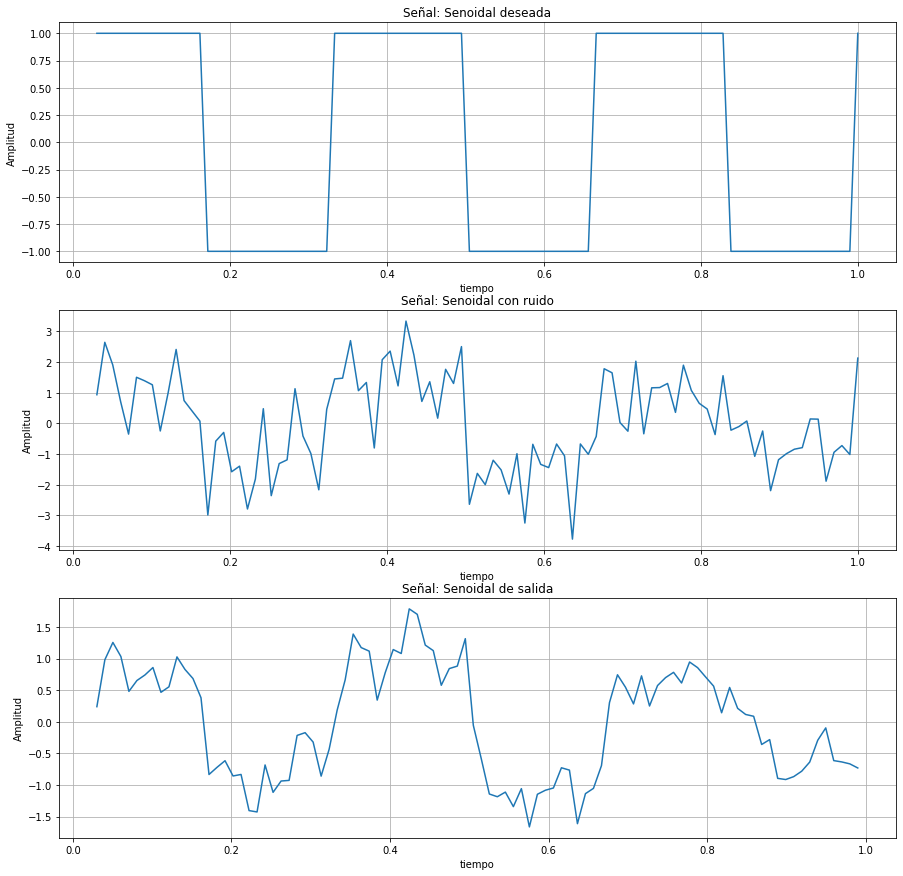

In [231]:
N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 50
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)